# Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats

In [25]:
sns.set(rc={"figure.figsize":(13, 9)})

In [26]:
#  Use files from Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_csv('/content/drive/MyDrive/Personal/Proyectos_Negocios/Propiedades_colombia/rental_apps_colombia_v2_wo_outlres.csv')

In [28]:
data.head(5)

,rent_price,area,build_area,rooms,baths,garages,city,zone,neighborhood
0,500000,45.0,45.0,1.0,1,0.0,Barranquilla,Suroccidente,ALFONSO LOPEZ
1,500000,36.0,36.0,1.0,1,0.0,Ubate,NaN,CENTRO
2,500000,25.0,25.0,1.0,1,1.0,Guaduas,NaN,JARDINES DE GUADUAS
3,500000,45.0,45.0,1.0,1,0.0,Cartagena de Indias,Área Urbana,URBANIZACION LOS CORALES
4,500000,50.0,50.0,1.0,1,0.0,Palmira,NaN,BARRIO COLOMBIA


# Exploratory Data Analysis

## Binning

<AxesSubplot:xlabel='rent_price_binned', ylabel='Count'>

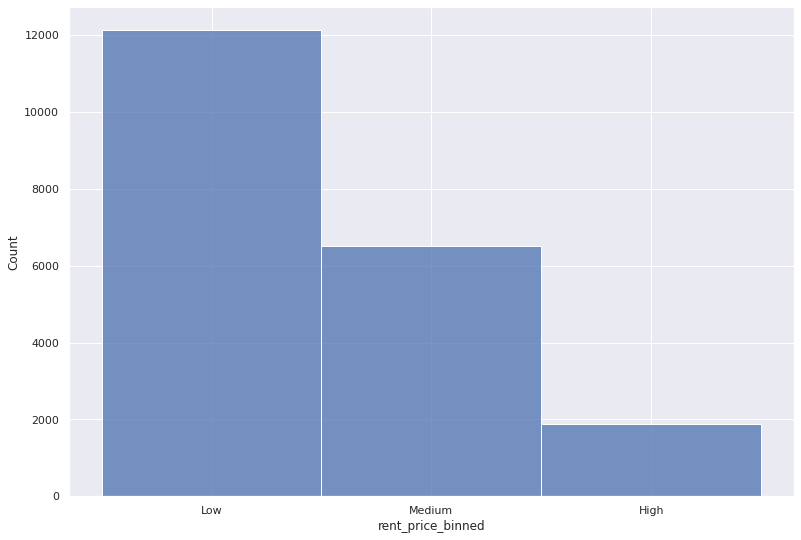

In [29]:
bins = np.linspace(min(data['rent_price']), max(data['rent_price']), 4)
group_names = ['Low', 'Medium', 'High']
data['rent_price_binned'] = pd.cut( data['rent_price'], bins, labels=group_names, include_lowest=True )
sns.histplot(data=data, x="rent_price_binned")

Conclussion: Most properties are found in the Low group, followed by Medium and the minority is in High


---



## Dummies
Create dummies variables for categorical variables

In [30]:
city_dummies = pd.get_dummies(data['city'])
city_dummies.head(5)

,Abejorral,Anapoima,Antioquia,Arauca,Armenia,Barbosa,Barrancabermeja,Barranquilla,Bello,Bogotá D.C.,...,Turbaco,Ubate,Valledupar,Villa De Leyva,Villamaria,Villavicencio,Villeta,Yumbo,Zipacon,Zipaquira
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Some stats values for numerical variables

In [31]:
data.describe()

,rent_price,area,build_area,rooms,baths,garages
count,2.052400e+04,20524.000000,20524.000000,20524.000000,20524.000000,20524.000000
mean,2.633095e+06,87.450772,88.051082,2.326691,2.114939,1.059102
std,1.719286e+06,44.400447,47.652341,0.829537,0.901737,0.809102
min,4.500000e+01,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.283000e+06,55.357500,56.000000,2.000000,2.000000,0.000000
50%,2.200000e+06,75.000000,75.000000,2.000000,2.000000,1.000000
75%,3.500000e+06,110.000000,110.000000,3.000000,3.000000,2.000000
max,8.000000e+06,240.000000,1743.000000,5.000000,5.000000,4.000000


Summarize the categorical variable "City"

In [32]:
city_count = data['city'].value_counts().to_frame()
city_count.rename(columns={'city': 'counts'}, inplace=True)
city_count

,counts
Bogotá D.C.,7387
Medellín,4558
Barranquilla,1104
Pereira,1093
Envigado,1020
...,...
Villa De Leyva,1
San Antonio de Prado,1
Guaduas,1
Socorro,1


Conclussion: We have Bogotá D.C. (7387) as the city with more properties for rent, followed by Medellin (4558) and Barranquilla (1104). On the other hand, San Andrés and Socorro are one of the cities with only 1 property for rent.


---

## Scatter Plot for Area vs Rent Price, colored by Number of rooms

<AxesSubplot:xlabel='area', ylabel='rent_price'>

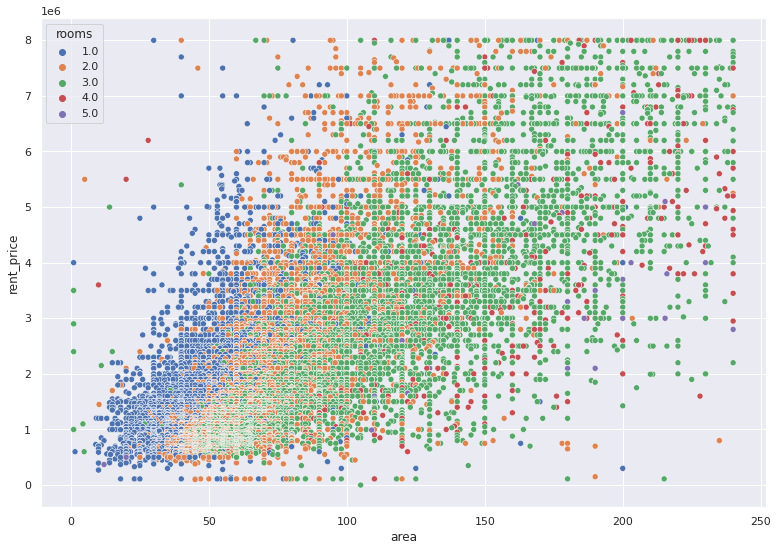

In [33]:
sns.scatterplot(data=data, x='area', y='rent_price', hue='rooms', palette="deep")

Conclussion: There is a not to high positive correlation between the area and the rent price. Properties with 1 room are acumulated in the range of area from 0 to 50. Properties with 2 and 3 rooms are acumulated in the range of area from 50 to 200. 

---

## Pivot Table 
To see the average rent price by number of rooms and baths 

In [34]:
data_t = data[['rooms', 'baths', 'rent_price']]
data_grp = data_t.groupby(['rooms', 'baths'], as_index=False).mean()
data_pvt = data_grp.pivot(index='rooms', columns='baths')
data_pvt.sort_index(ascending=False, inplace=True)
data_pvt

rent_price                                                          \
baths             0             1             2             3             4   
rooms                                                                         
5.0    1.300000e+06  1.250000e+06  1.679475e+06  3.936111e+06  3.400400e+06   
4.0    2.050000e+06  1.628500e+06  2.355676e+06  3.420549e+06  4.726706e+06   
3.0    2.011364e+06  1.075592e+06  2.113317e+06  3.839803e+06  5.091190e+06   
2.0    2.002000e+06  1.120150e+06  2.473575e+06  4.161880e+06  5.512450e+06   
1.0    2.032959e+06  1.614173e+06  2.900108e+06  4.564762e+06  4.900000e+06   

                     
baths             5  
rooms                
5.0    3.563333e+06  
4.0    5.644108e+06  
3.0    5.882874e+06  
2.0    5.988000e+06  
1.0             NaN

Heatmap of the previous pivot table

Text(0.5, 57.5, 'baths')

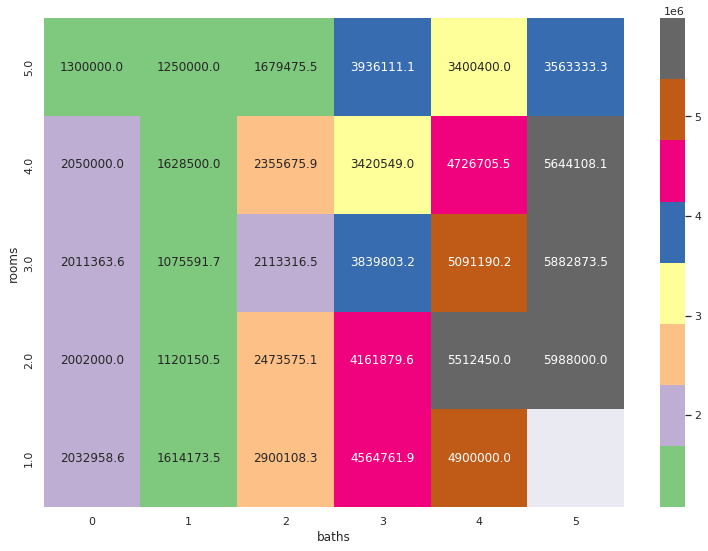

In [35]:
sns.heatmap(data_pvt, annot=True, fmt=".1f", cmap="Accent", xticklabels=[0,1,2,3,4,5])
plt.xlabel('baths')

## Regresion plot Number of rooms vs Rent Price

<AxesSubplot:xlabel='rooms', ylabel='rent_price'>

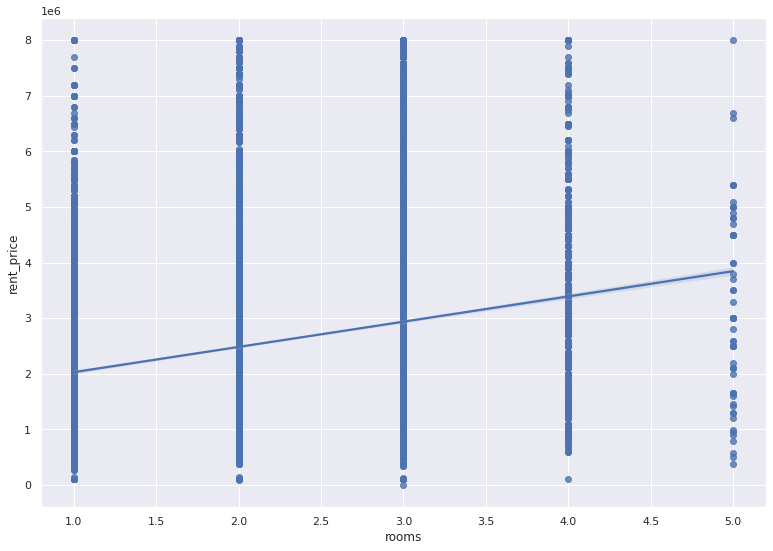

In [36]:
sns.regplot(x='rooms', y='rent_price', data=data)

## Pearson Correlation and P-value for some variables vs Rent Price

In [37]:
#  Correlation between various variables
p_coef, p_value = stats.pearsonr(data['rooms'], data['rent_price'] )
print('Pearson correlation rooms vs rent_price:', p_coef, "    -   P-value:", p_value)
p_coef, p_value = stats.pearsonr(data['baths'], data['rent_price'] )
print('Pearson correlation baths vs rent_price:', p_coef, "   -   P-value:", p_value)
p_coef, p_value = stats.pearsonr(data['garages'], data['rent_price'] )
print('Pearson correlation garages vs rent_price:', p_coef, "  -   P-value:", p_value)

Pearson correlation rooms vs rent_price: 0.219089399239701     -   P-value: 1.5766691330011322e-221
Pearson correlation baths vs rent_price: 0.6373806676645113    -   P-value: 0.0
Pearson correlation garages vs rent_price: 0.654009772698714   -   P-value: 0.0


Heatmap of the correlation of numerical variables

<AxesSubplot:>

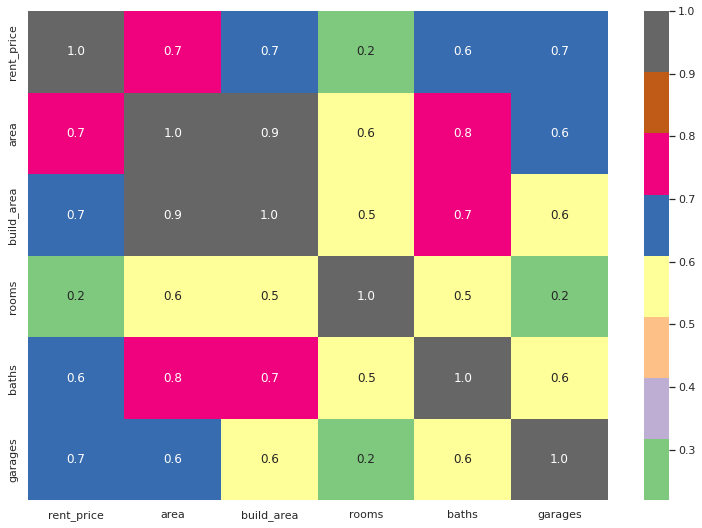

In [38]:
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap="Accent")

## Linear Regression between Area and Rent Price

In [39]:
lm = LinearRegression()
x = data[['area']]
y = data[['rent_price']]
lm.fit(x, y)
print(lm.intercept_)
print(lm.coef_)

[214927.79225531]
[[27651.75138084]]


## Linear Regression (A) between Area, Number of baths and Number of garages vs Rent Price
Don't use Number of rooms because the correlation is too low

In [40]:
lm = LinearRegression()
x = data[['area', 'baths', 'garages']]
y = data[['rent_price']]
lm.fit(x, y)
Yhat = lm.predict(x)
print(lm.intercept_)
print(lm.coef_)

[4420.37843627]
[[ 16802.43249454 202496.75717476 690227.03347616]]


## Residual plot between Area and Rent Price

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='rent_price'>

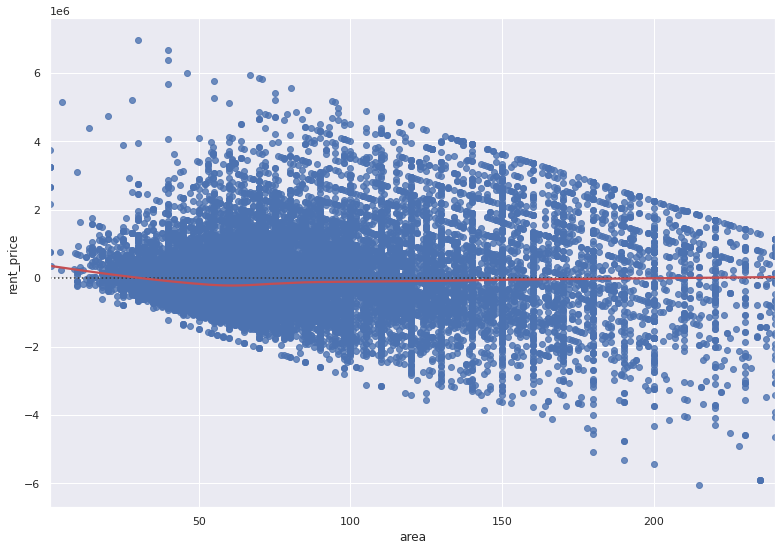

In [41]:
sns.residplot(data['area'], data['rent_price'], lowess=True, line_kws=dict(color="r"))

## Actual values vs Fitted Values in the Linear Regression (A)
Linear Regression (A): Rent Price vs Area, Number of baths and Number of garages

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent_price', ylabel='Density'>

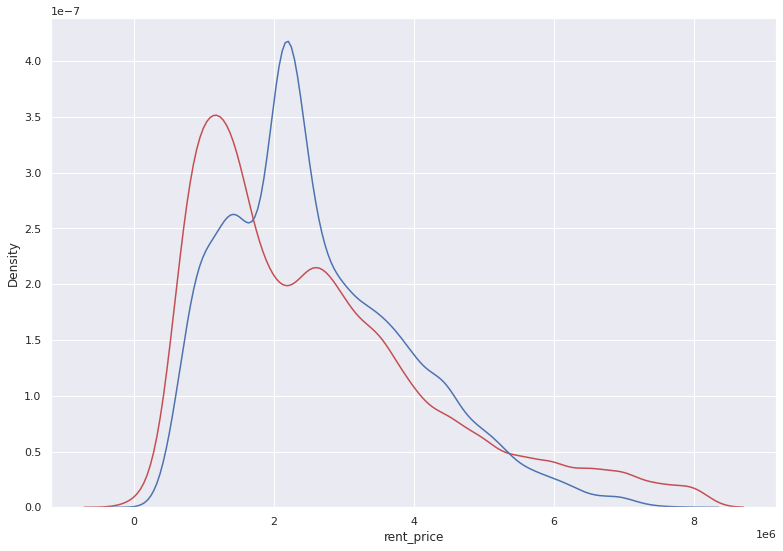

In [42]:
axl = sns.distplot( data['rent_price'], hist=False, color='r', label='Actual Value' )
sns.distplot(Yhat, hist=False, color='b', label='Fitted Value', ax=axl)

## Linear Regression (B) between Area, Number of baths, Number of garages and City (dummies) vs Rent Price

In [57]:
new_full_data = pd.concat([data, city_dummies], axis=1)

x_columns_b = ['area', 'baths', 'garages'] + list(city_dummies.columns)

lm_b = LinearRegression()
x_new = new_full_data[x_columns_b]
y_new = new_full_data[['rent_price']]
lm_b.fit(x_new, y_new)
Yhat_new = lm_b.predict(x_new)

## Actual values vs Fitted Values in the Linear Regression (B)
Linear Regression (B): Rent Price vs Area, Number of baths, Number of garages and City (dummies)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent_price', ylabel='Density'>

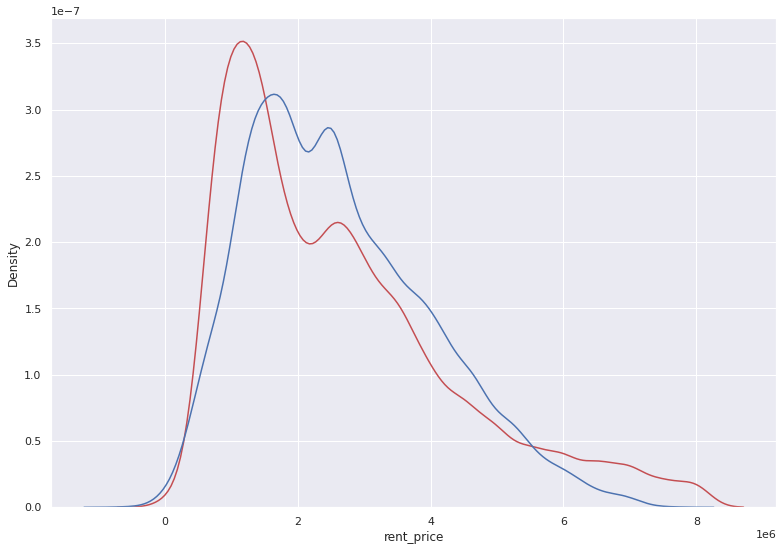

In [44]:
axl_new = sns.distplot( new_full_data['rent_price'], hist=False, color='r', label='Actual Value' )
sns.distplot(Yhat_new, hist=False, color='b', label='Fitted Value', ax=axl_new)

## Linear Regression (C) between Area, Number of baths, Number of garages, Number of rooms and City (dummies) vs Rent Price

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent_price', ylabel='Density'>

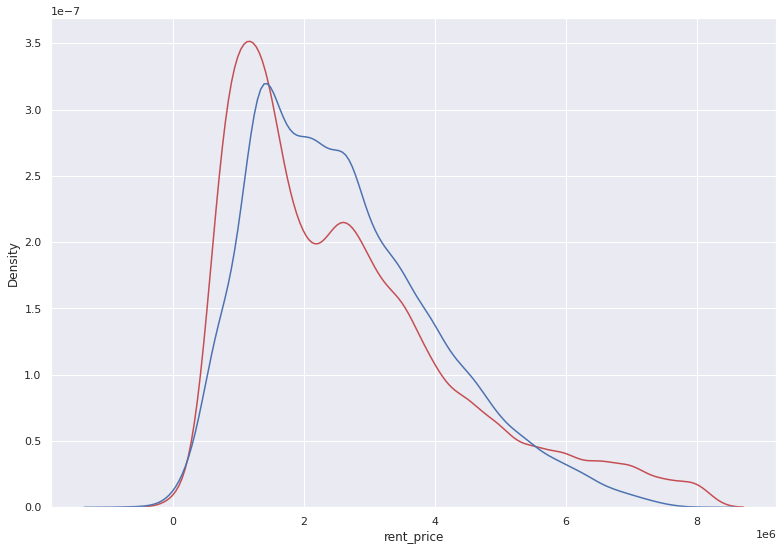

In [45]:
x_columns_c = ['rooms', 'area', 'baths', 'garages'] + list(city_dummies.columns)

lm = LinearRegression()
x_new = new_full_data[x_columns_c]
y_new = new_full_data[['rent_price']]
lm.fit(x_new, y_new)
Yhat_new = lm.predict(x_new)

axl_new = sns.distplot( new_full_data['rent_price'], hist=False, color='r', label='Actual Value' )
sns.distplot(Yhat_new, hist=False, color='b', label='Fitted Value', ax=axl_new)

# Function that predicts the price

In [85]:
print('Cities Available: ', list(city_dummies.columns))
def prediction_reg_b(area, baths, garages, city, model=lm_b):
    temp_df = pd.DataFrame(columns=x_columns_b)
    temp_df['area'] = [area]
    temp_df['baths'] = [baths]
    temp_df['garages'] = [garages]
    temp_df[city] = [1]
    temp_df.fillna(0, inplace=True)
    price = model.predict(temp_df[x_columns_b])[0][0]
    return price

Cities Available:  ['Abejorral', 'Anapoima', 'Antioquia', 'Arauca', 'Armenia', 'Barbosa', 'Barrancabermeja', 'Barranquilla', 'Bello', 'Bogotá D.C.', 'Briceño', 'Bucaramanga', 'Buenaventura', 'Cajicá', 'Caldas', 'Cali', 'Calima', 'Candelaria', 'Carepa', 'Carmen De Viboral', 'Cartagena de Indias', 'Cerete', 'Chipaque', 'Choachi', 'Choconta', 'Chía', 'Cienaga', 'Cogua', 'Colombia', 'Copacabana', 'Cota (Incluye Siberia)', 'Cundinamarca', 'Cúcuta', 'Dos Quebradas', 'Duitama', 'El Colegio', 'El Rosal', 'Envigado', 'Espinal', 'Facatativa', 'Flandes', 'Florencia', 'Florian', 'Floridablanca', 'Frontino', 'Funza', 'Fusagasuga', 'Gachancipa', 'Galapa', 'Girardot', 'Girardota', 'Giron', 'Guaduas', 'Guarne', 'Guatape', 'Ibagué', 'Itagui', 'Jamundi', 'La Calera', 'La Ceja', 'La Estrella', 'La Mesa', 'La Tebaida', 'La Vega', 'La Victoria', 'Madrid', 'Malambo', 'Manizales', 'Marinilla', 'Medellín', 'Melgar', 'Montería', 'Mosquera', 'Neiva', 'Palmira', 'Pance', 'Pasto', 'Pereira', 'Piedecuesta', 'Popay

In [88]:
prediction_reg_b(area=150, baths=2, garages=2, city='Bogotá D.C.')

4426739.0